# Übungsblatt 7 #

### Alice Ziegler, Daniel Schneider ###

## Aufgabe 7.1: Lineare Diskriminanz: Gradient ##

## Aufgabe 7.2: Logistische Diskriminanz ##

In [1]:
import pandas as pd
import random
import math

In [2]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",
    header=None,
    names = ["age", "year", "axillary_nodes", "survival"]
)

In [3]:
data["survival"] = data["survival"].subtract(1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
year              306 non-null int64
axillary_nodes    306 non-null int64
survival          306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [5]:
def absListDist(list1, list2):
    return [abs(i-j) for (i,j) in zip(list1, list2)]

In [6]:
def convergence(wNew, wOld):
    if (type(wNew[0]) == type(wOld[0])):
        return (max(absListDist(wNew, wOld)) < 1e-3)
    else:
        return False

In [7]:
def sigmoid(x):
    return (1/(1+math.exp(-x)))

In [8]:
def logisticDiscrimination(data, classAttribute):
    
    data2 = data.copy()
    
    data2['ones'] = 1
    
    cols = list(data2.columns.values)
    cols = [cols[len(cols)-1]] + cols[0:(len(cols)-1)]
    
    data2 = data2.reindex_axis(cols,axis=1)
    
    t = data2[classAttribute]
    #print(t)
    dataW = data2.drop(classAttribute, axis=1)
    
    N, d = dataW.shape
    
    wCurr = [None]*d
    wPrev = [None]*d
    deltaW = [None]*d
    
    nu = 1e-4
    
    for j in range(d):
        wCurr[j] = random.uniform(-0.01,0.01)
    
    while not convergence(wCurr,wPrev):
        
        for j in range(d):
            deltaW[j] = 0
            wPrev[j] = wCurr[j]
        
        for i in range(N):
            temp = 0
            
            for j in range(d):
                temp += wCurr[j] * dataW[cols[j]][i]
            
            y = sigmoid(temp)
            #print(y)
            #print(t[i])
            
            for j in range(d):
                deltaW[j] += (t[i] - y) * dataW[cols[j]][i]
        
        #print(deltaW)
        
        for j in range(d):
            wCurr[j] += nu * deltaW[j]
            
            #print(wCurr[j])
            #print(wPrev[j])
    
        #print(convergence(wCurr,wPrev))
        nu *= 0.9
    return wCurr

In [9]:
def classify(data, ws):
    data2 = data.copy()
    
    data2['ones'] = 1
    
    cols = list(data2.columns.values)
    cols = [cols[len(cols)-1]] + cols[0:(len(cols)-1)]
    
    data2 = data2.reindex_axis(cols,axis=1)
    
    #print(data2)
    
    N, d = data2.shape
    
    c = [None]*N
    
    for i in range(N):
        
        c[i] = 0
        for j in range(d):
            c[i] = c[i] + ws[j] * data2[cols[j]][i]
        
        if(c[i] > 0):
            c[i] = 1
        else:
            c[i] = 0
    
    return c

In [10]:
testing = data.sample(int(data.shape[0]/2),)
training = data.drop(testing.index)

testing.reset_index(drop=True,inplace=True)
training.reset_index(drop=True,inplace=True)

In [11]:
testingNoClass = testing.drop('survival',axis=1)

In [12]:
ws = logisticDiscrimination(training, 'survival')

In [13]:
classes = classify(testingNoClass,ws)

In [14]:
def errorRate(orig, generated):
    err = 0
    for h in range(len(orig)):
        if orig[h] != generated[h]:
            err += 1
            
    return err/len(orig)

In [15]:
1 - errorRate(testing['survival'],classes)

0.7516339869281046

In etwas mehr als $75\%$ der Fälle lag der Klassifizierer richtig

## Aufgabe 7.3: Support Vector Machine ##

### a) Generieren der Datensätze ###

In [19]:
def data_generator(intercept, slope, size):
    def f(x): 
        return (slope*x + intercept)
    
    random.seed(1337)
    data = []
    
    for _ in range (size):
        while True:
            x = random.random()
            y = random.random()
            label = 1 if f(x) > y else -1
            
            if abs(f(x) - y) > 0.1:
                break ;
        
        data.append((x, y, label))
    return data

    

In [17]:
size = 100

In [355]:
gen1 = np.asarray(data_generator(-0.1,0.7,size))
gen1NoClass = gen1[:,0:2]

In [352]:
gen2 = np.asarray(data_generator(0.1,2.0,size))
gen2NoClass = gen2[:,0:2]

In [353]:
gen3 = np.asarray(data_generator(0.75,-0.2,size))
gen3NoClass = gen3[:,0:2]

In [354]:
gen4 = np.asarray(data_generator(1.0,-1.0,size))
gen4NoClass = gen4[:,0:2]

In [380]:
gen1

array([[ 0.61775286,  0.53326557, -1.        ],
       [ 0.36584836,  0.58578735, -1.        ],
       [ 0.16568728,  0.82437375, -1.        ],
       [ 0.38370481,  0.78961282, -1.        ],
       [ 0.92172651,  0.30763339,  1.        ],
       [ 0.99224707,  0.204946  ,  1.        ],
       [ 0.65627763,  0.91230534, -1.        ],
       [ 0.1092884 ,  0.82043763, -1.        ],
       [ 0.39873905,  0.06534313,  1.        ],
       [ 0.40358753,  0.80161255, -1.        ],
       [ 0.80006513,  0.66374888, -1.        ],
       [ 0.83250653,  0.59445681, -1.        ],
       [ 0.46093368,  0.95756339, -1.        ],
       [ 0.79572026,  0.3137279 ,  1.        ],
       [ 0.69054137,  0.9151    , -1.        ],
       [ 0.52544343,  0.61867322, -1.        ],
       [ 0.57729775,  0.0438804 ,  1.        ],
       [ 0.40747   ,  0.65292276, -1.        ],
       [ 0.61974555,  0.67559887, -1.        ],
       [ 0.63499788,  0.19702205,  1.        ],
       [ 0.28492583,  0.4523282 , -1.   

### b) Lernen der Trennebene ###

In [39]:
import scipy.optimize as sco
import numpy as np

In [331]:
def minimize(data,classID):
    N = data.shape[0]
    
    xs = np.c_[np.ones(N), data]
    #print(xs)
    
    ts = xs[:,classID]
    xs = np.delete(xs, [classID], axis=1)
    
    N,d = xs.shape
    
    wInit = np.empty([d,1])
    for j in range(d):
        wInit[j] = random.uniform(-0.01,0.01)
    
    #print(wInit)
    #print(np.square(wInit))
    #print(xs)
    #print((np.dot(np.transpose(wInit), np.transpose(xs))))
    #print(ts)
    #print(ts * (np.dot(np.transpose(wInit), np.transpose(xs))))
    
    return sco.minimize(
        fun = lambda ws: (1/2 * np.square(np.linalg.norm(ws))),
        x0 = wInit,
        constraints = {'type': 'ineq', 'fun': (lambda ws: (ts * (np.dot(np.transpose(ws), np.transpose(xs))).flatten() - 1))}
    )

In [332]:
res1 = minimize(gen1,3)

In [322]:
res2 = minimize(gen2,3)

In [323]:
res3 = minimize(gen3,3)

In [324]:
res4 = minimize(gen4,3)

In [381]:
res1

     fun: 62.462987328671204
     jac: array([-0.94338465,  6.37082291, -9.13502121,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-0.94338498,  6.37082276, -9.13502144])

### c) Plotten der Daten und Trennlinien ###

In [115]:
import matplotlib.pyplot as plt

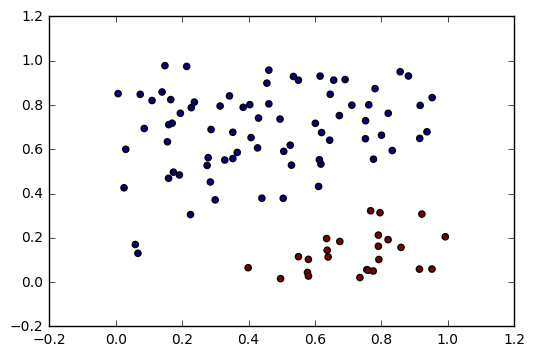

In [387]:
plt.scatter(gen1[:,0],gen1[:,1],c=gen1[:,2])

#xVals = np.arange(0,1, 0.01)
#abline = evaluateFunction(res1.x,xVals)
#plt.plot(xVals,abline)
plt.show()

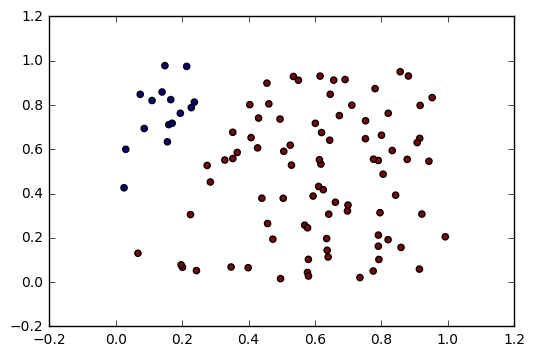

In [388]:
plt.scatter(gen2[:,0],gen2[:,1],c=gen2[:,2])

#xVals = np.arange(0,1, 0.01)
#abline = evaluateFunction(res2.x,xVals)
#plt.plot(xVals,abline)
plt.show()

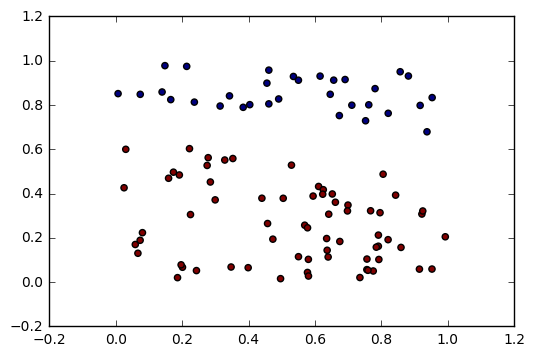

In [394]:
plt.scatter(gen3[:,0],gen3[:,1],c=gen3[:,2])

#xVals = np.arange(0,1, 0.01)
#abline = evaluateFunction(res3.x,xVals)
#plt.plot(xVals,abline)
plt.show()

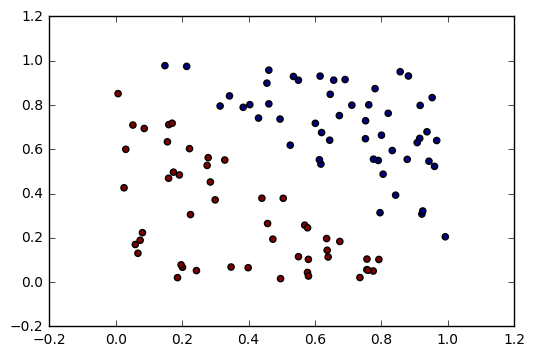

In [391]:
plt.scatter(gen4[:,0],gen4[:,1],c=gen4[:,2])

#xVals = np.arange(0,1, 0.01)
#abline = evaluateFunction(res4.x,xVals)
#plt.plot(xVals,abline)
plt.show()

In [369]:
def compareClasses(classes1,classes2):
    errors = 0
    
    for i in range(classes1.shape[0]):
        if classes1[i] != classes2[i]:
            errors += 1
    
    return errors

In [370]:
classify1 = np.dot(np.transpose(res1.x), np.transpose(np.c_[np.ones(gen1NoClass.shape[0]), gen1NoClass]))

In [372]:
classify2 = np.dot(np.transpose(res2.x), np.transpose(np.c_[np.ones(gen2NoClass.shape[0]), gen2NoClass]))

In [373]:
classify3 = np.dot(np.transpose(res3.x), np.transpose(np.c_[np.ones(gen3NoClass.shape[0]), gen3NoClass]))

In [374]:
classify4 = np.dot(np.transpose(res4.x), np.transpose(np.c_[np.ones(gen4NoClass.shape[0]), gen4NoClass]))

In [371]:
compareClasses(gen1[:,2] > 0, classify1 > 0)

0

In [375]:
compareClasses(gen2[:,2] > 0, classify2 > 0)

0

In [376]:
compareClasses(gen3[:,2] > 0, classify3 > 0)

0

In [377]:
compareClasses(gen4[:,2] > 0, classify4 > 0)

0

Die Klassifizierung stimmt in allen Fällen mit den ursprünglichen Klassen überein, die Daten wurden also durch die Klassifizierung vollständig getrennt